# Models Trained on Tumor Images Only (balanced data)

In [1]:
# import necessary libraries
import numpy as np
from torch import nn
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
from IPython.display import display
from utils import *

In [2]:
! pip install git+https://github.com/davidbau/baukit

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/davidbau/baukit to c:\users\j-dog\appdata\local\temp\pip-req-build-uxn1mh2x
  Resolved https://github.com/davidbau/baukit to commit 9d51abd51ebf29769aecc38c4cbef459b731a36e
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/davidbau/baukit 'C:\Users\J-Dog\AppData\Local\Temp\pip-req-build-uxn1mh2x'


Define Global Variable

In [3]:
paper_transform = torchvision.transforms.Compose([
    torchvision.transforms.Grayscale(num_output_channels=1),
    torchvision.transforms.ToTensor() ])

In [4]:
adj_transform = transforms.Compose([
    transforms.ToTensor(),  
    torchvision.transforms.Grayscale(num_output_channels=1),
    # Convert images to tensors
    transforms.Normalize((0.,), (1.,))  # Normalize image tensors
])

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Train and Evaluate Adjusted Model

In [6]:
# create train, validition, and test sets
balanced_adj_train_set = torchvision.datasets.ImageFolder(
    'balanced_data/tumor_only/train',
    transform=adj_transform
)

balanced_adj_train_loader = torch.utils.data.DataLoader(
    balanced_adj_train_set,
    batch_size=128,
    shuffle=True,
    num_workers=0,  
    pin_memory=True,
)

balanced_adj_val_set = torchvision.datasets.ImageFolder(
    'balanced_data/tumor_only/validation',
    transform=adj_transform
)

balanced_adj_val_loader = torch.utils.data.DataLoader(
    balanced_adj_val_set,
    batch_size=128,
    shuffle=True,
    num_workers=0, 
    pin_memory=True,
)

balanced_adj_test_set = torchvision.datasets.ImageFolder(
    'balanced_data/tumor_only/test',
    transform=adj_transform
)

balanced_adj_test_loader = torch.utils.data.DataLoader(
    balanced_adj_test_set,
    batch_size=128,
    shuffle=True,
    num_workers=0,  
    pin_memory=True,
)

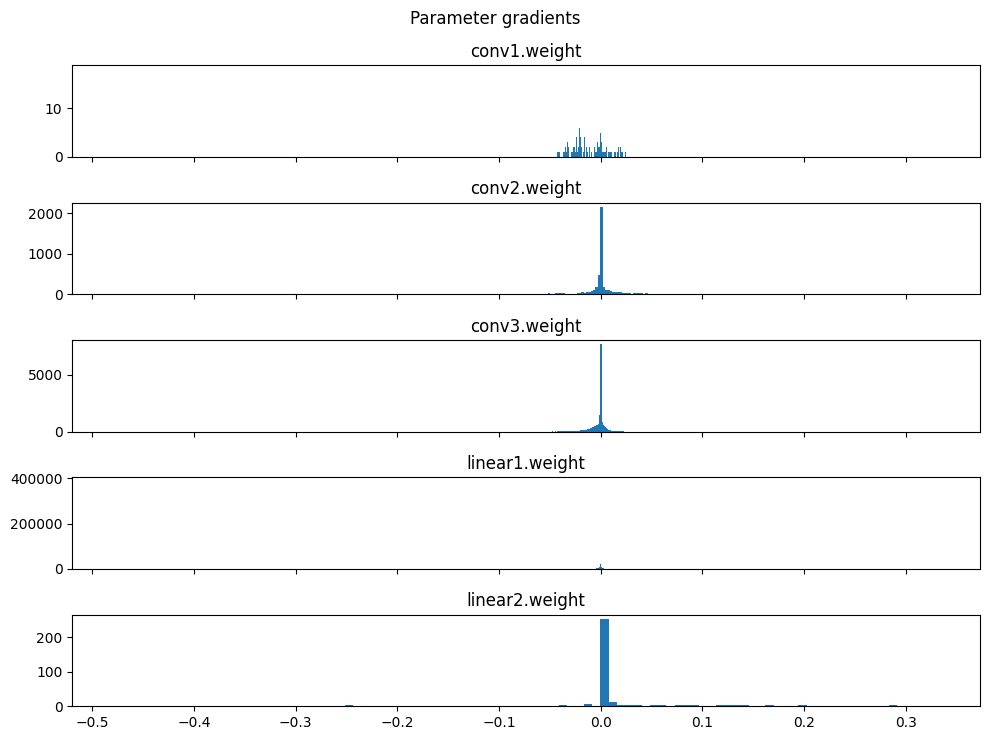

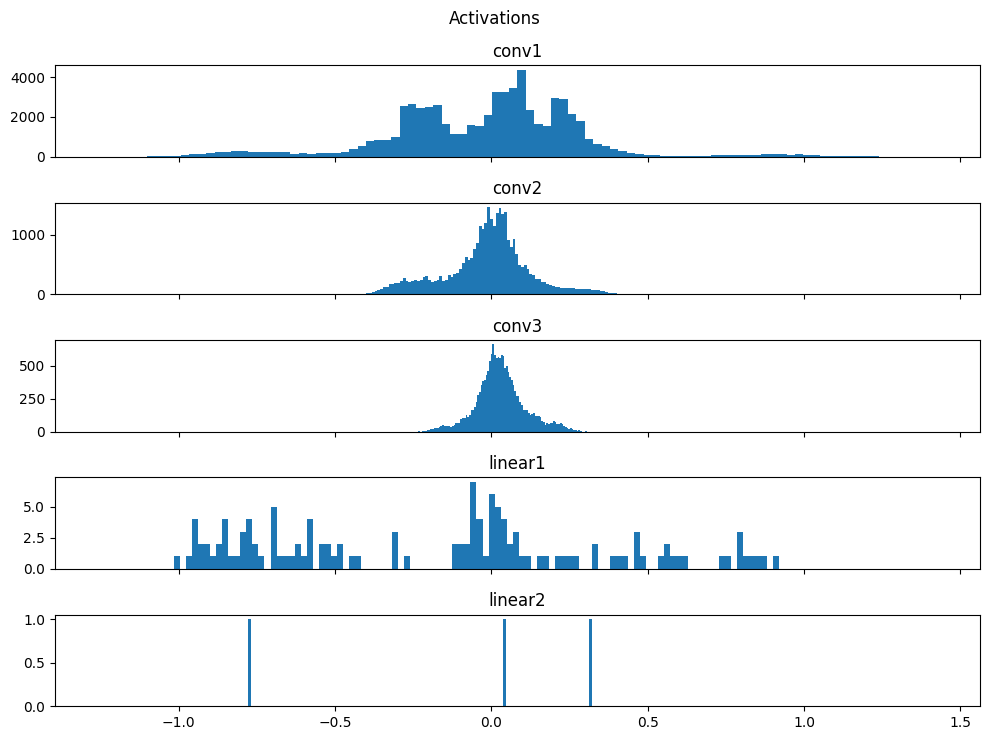

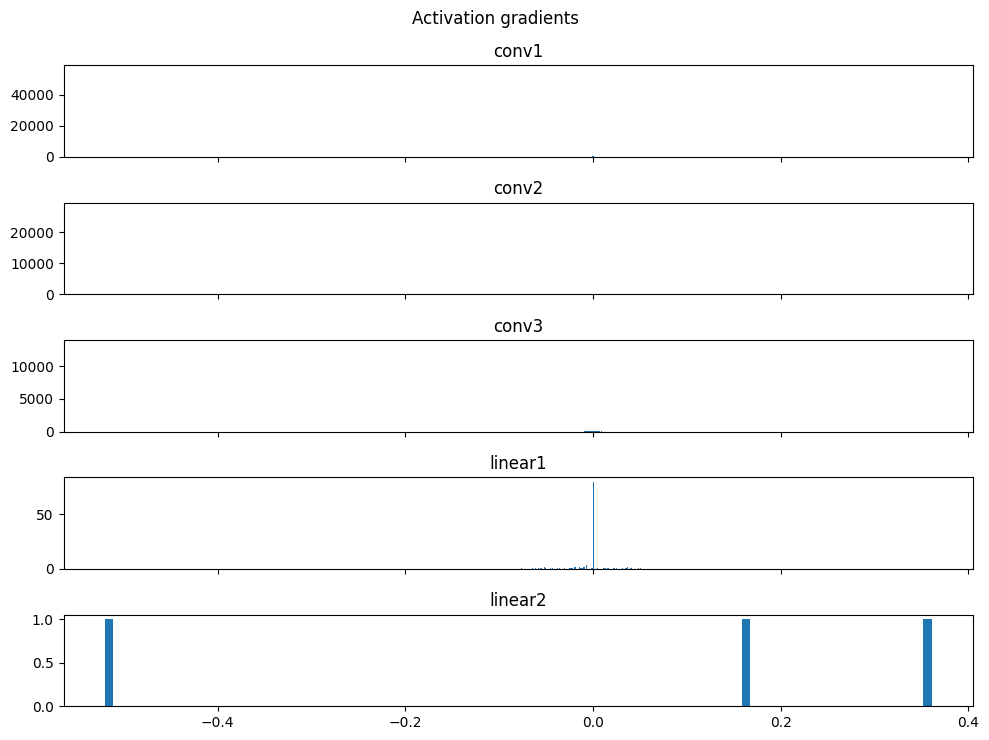

epoch: 1/20 | train loss=1.0521, train_acc=0.4347 | val loss: 0.9550, val_acc=0.5133
epoch: 2/20 | train loss=0.8247, train_acc=0.5927 | val loss: 0.8560, val_acc=0.5667
epoch: 3/20 | train loss=0.7409, train_acc=0.6473 | val loss: 0.6546, val_acc=0.6567
epoch: 4/20 | train loss=0.6688, train_acc=0.7127 | val loss: 0.6263, val_acc=0.8400
epoch: 5/20 | train loss=0.6035, train_acc=0.7513 | val loss: 0.5994, val_acc=0.8233


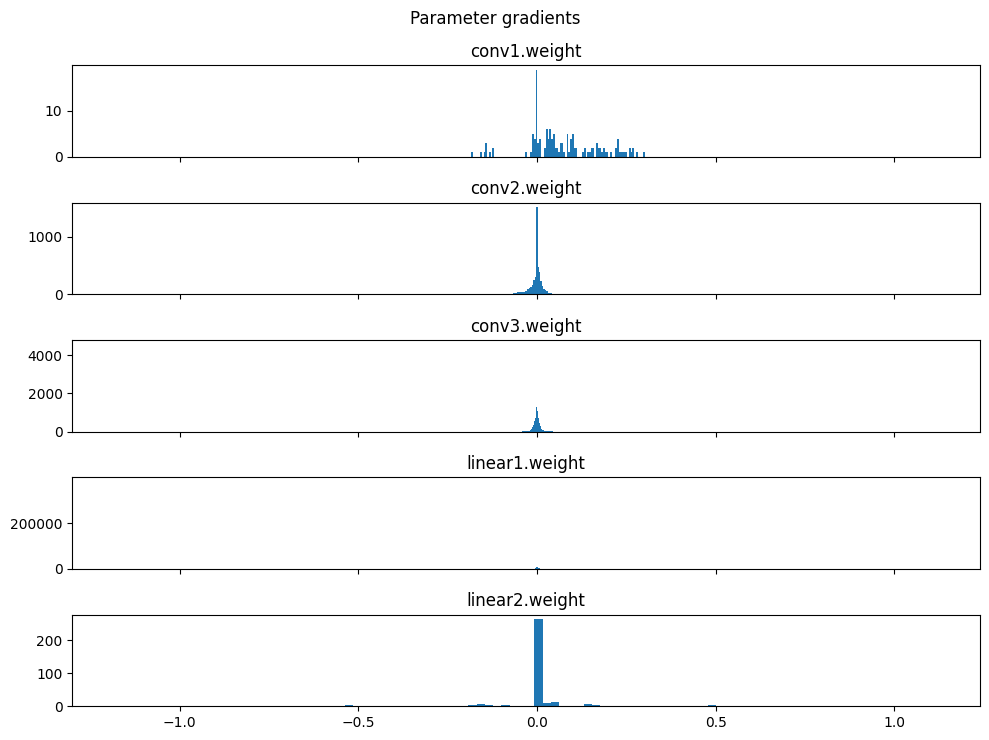

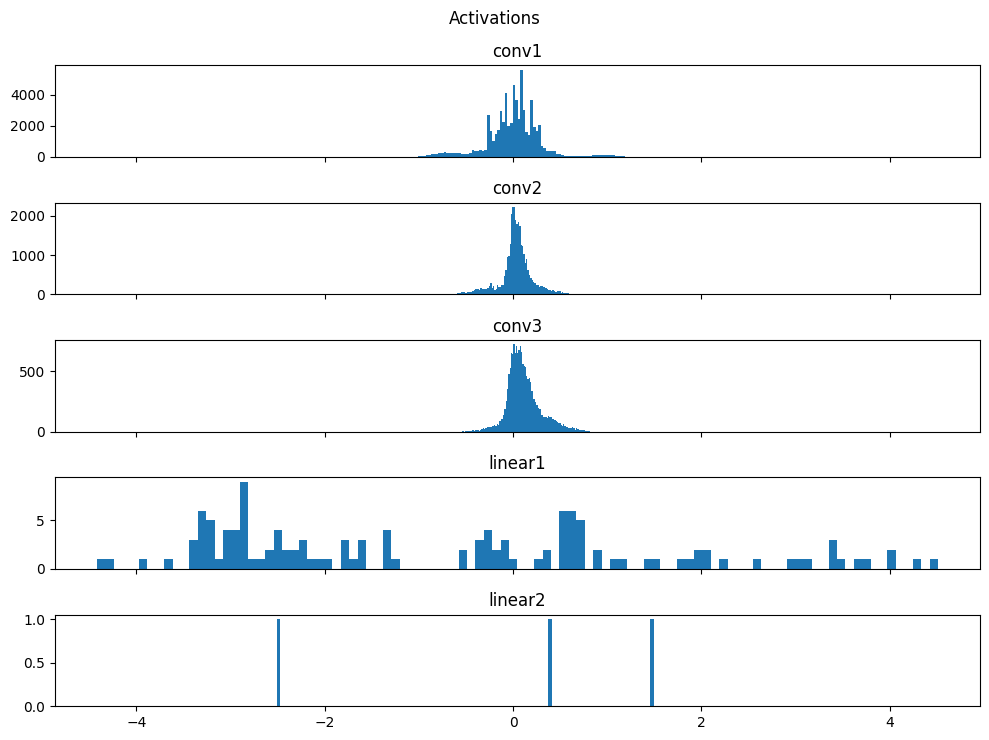

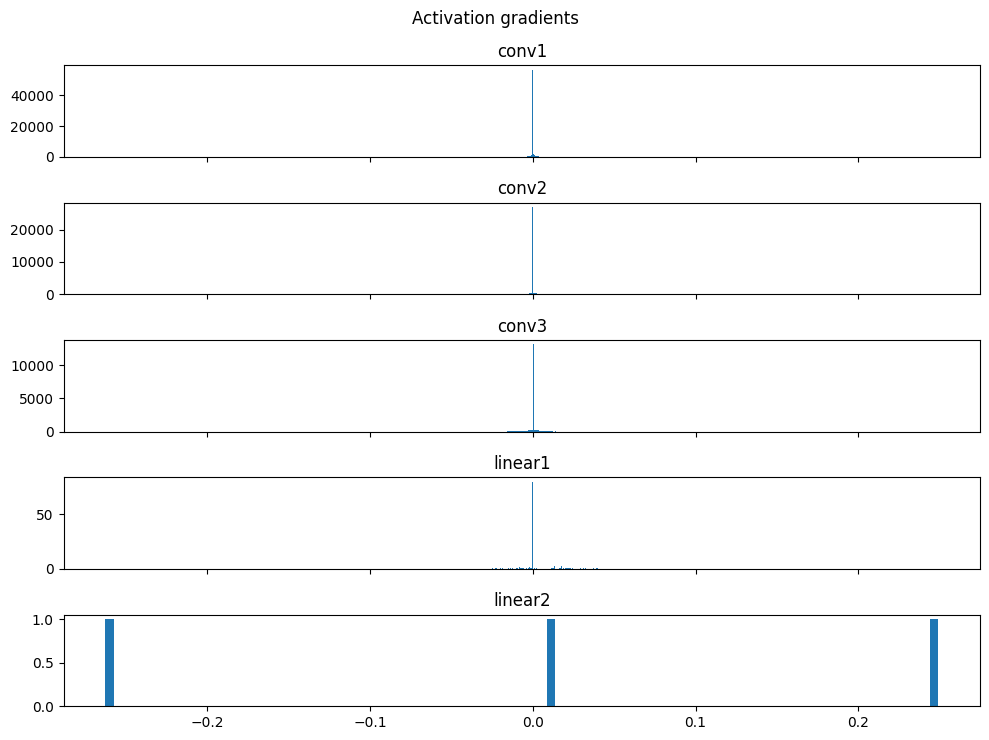

epoch: 6/20 | train loss=0.5456, train_acc=0.7867 | val loss: 0.5460, val_acc=0.8000
epoch: 7/20 | train loss=0.5125, train_acc=0.7887 | val loss: 0.6167, val_acc=0.7700
epoch: 8/20 | train loss=0.4908, train_acc=0.8067 | val loss: 0.4608, val_acc=0.7933
epoch: 9/20 | train loss=0.4155, train_acc=0.8333 | val loss: 0.5535, val_acc=0.7367
epoch: 10/20 | train loss=0.3874, train_acc=0.8460 | val loss: 0.5399, val_acc=0.7633


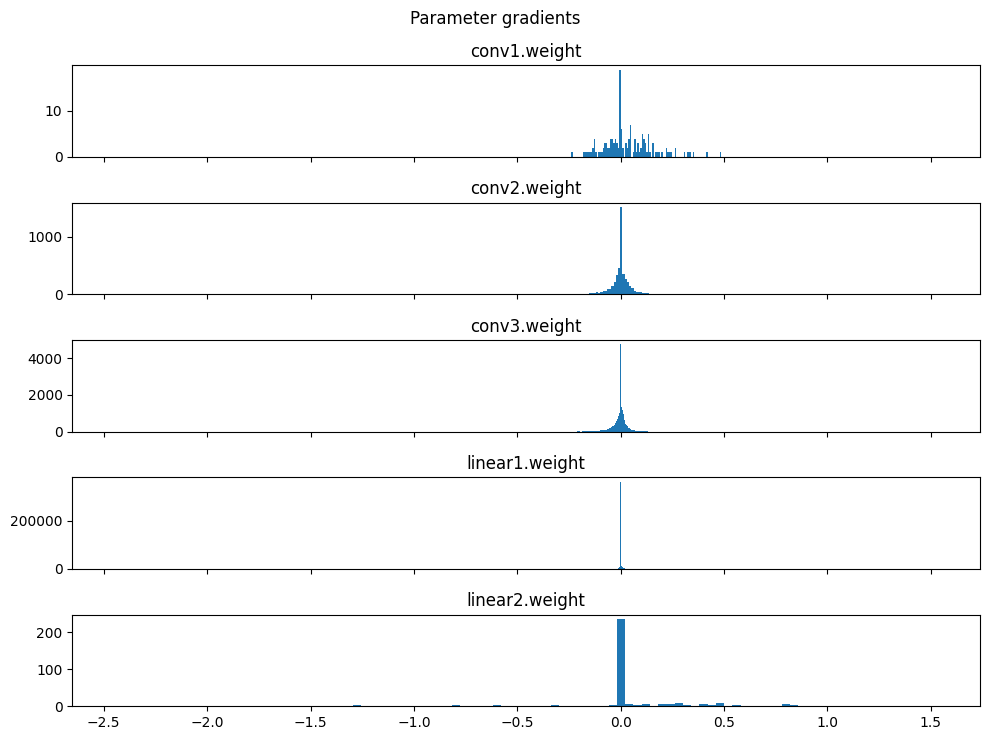

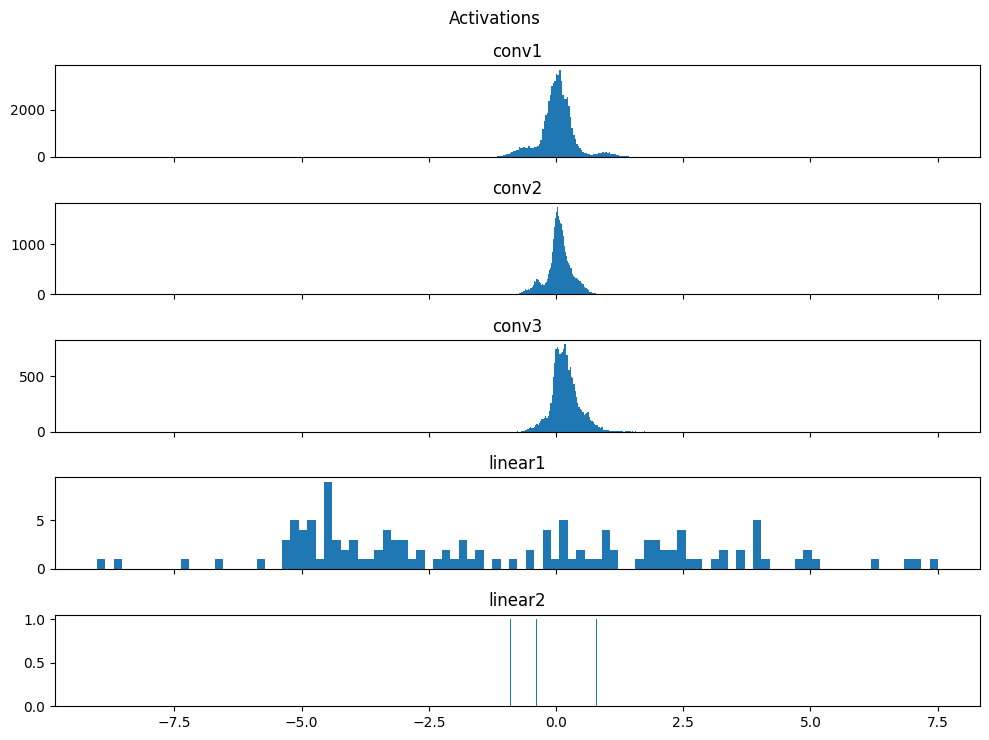

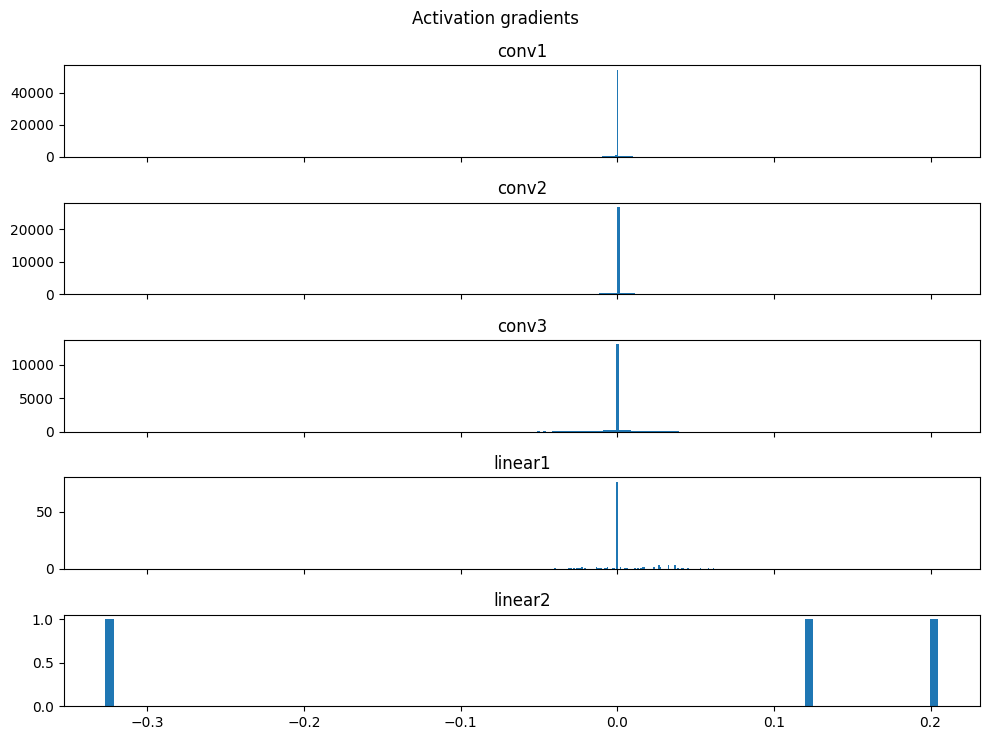

epoch: 11/20 | train loss=0.3577, train_acc=0.8553 | val loss: 0.4323, val_acc=0.8467
epoch: 12/20 | train loss=0.3594, train_acc=0.8513 | val loss: 0.5198, val_acc=0.7633
epoch: 13/20 | train loss=0.3359, train_acc=0.8660 | val loss: 0.5445, val_acc=0.7067
epoch: 14/20 | train loss=0.3154, train_acc=0.8760 | val loss: 0.4284, val_acc=0.7900
epoch: 15/20 | train loss=0.3035, train_acc=0.8820 | val loss: 0.6479, val_acc=0.7233


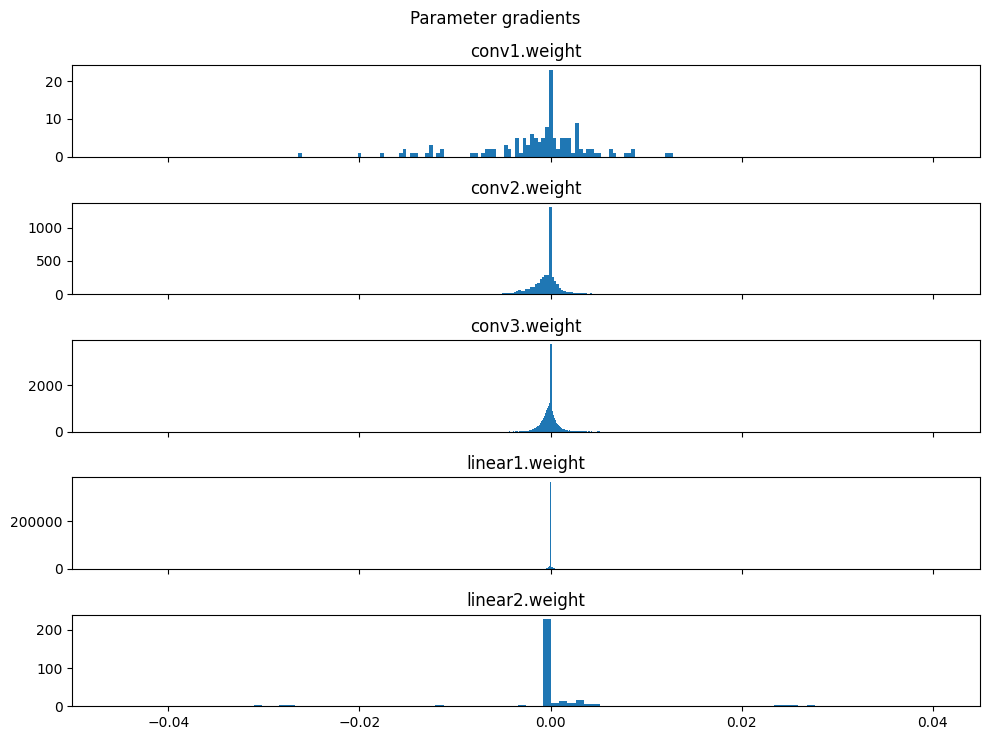

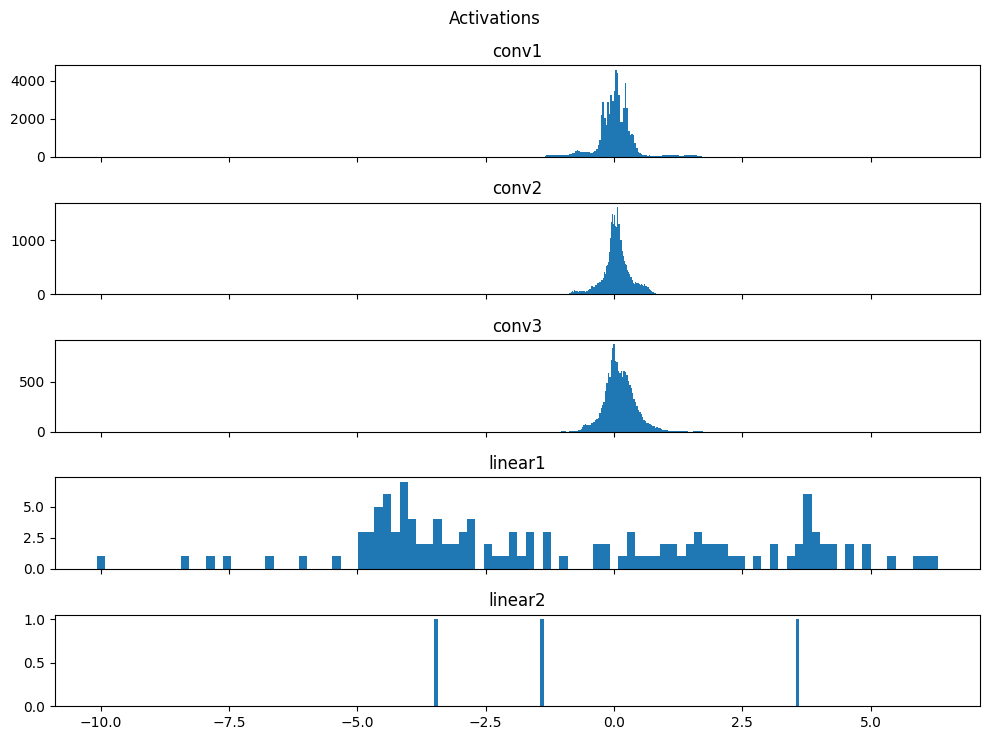

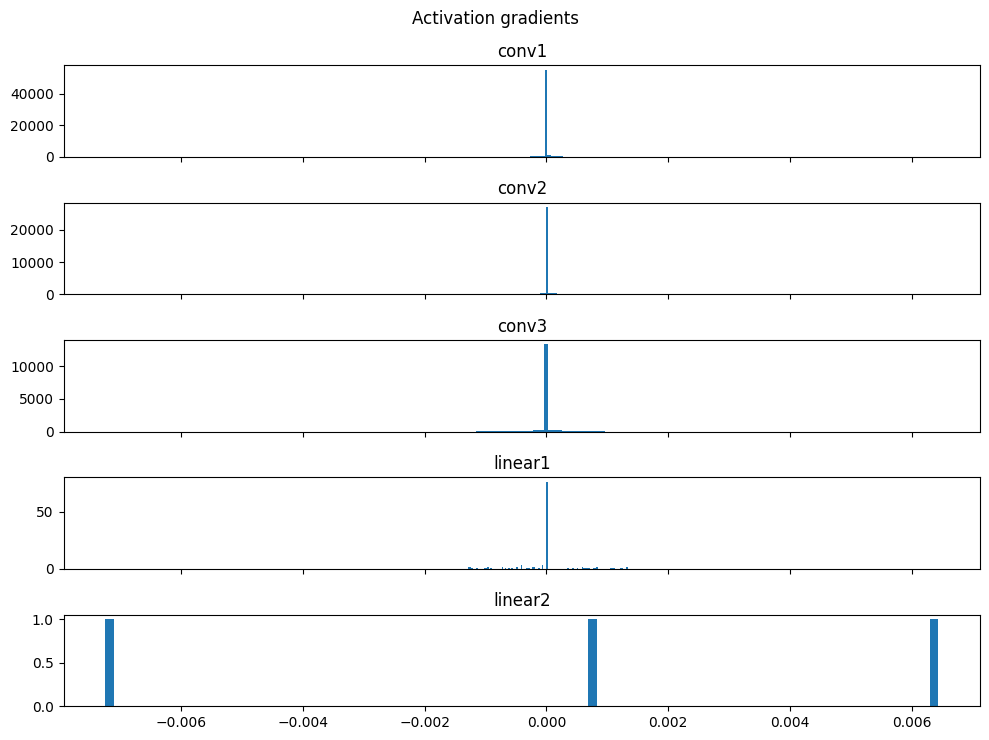

epoch: 16/20 | train loss=0.2856, train_acc=0.8767 | val loss: 0.5947, val_acc=0.7067
epoch: 17/20 | train loss=0.2835, train_acc=0.8807 | val loss: 0.5544, val_acc=0.7533
epoch: 18/20 | train loss=0.2533, train_acc=0.8973 | val loss: 0.5206, val_acc=0.7833
epoch: 19/20 | train loss=0.2389, train_acc=0.8973 | val loss: 0.6222, val_acc=0.7200
epoch: 20/20 | train loss=0.2516, train_acc=0.8907 | val loss: 0.6533, val_acc=0.7500


In [7]:
# number of classes in the dataset
num_classes = len(balanced_adj_train_set.classes)

# create adjusted model
model = BrainTumorCNN(num_classes).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 20

training_losses = []
training_accuracy = []
validation_losses = []
validation_accuracy = []

for epoch in range(epochs):
    plot_grads = True if epoch % 5 == 0 else False
    train_loss, train_acc = train_model(model, balanced_adj_train_loader, loss_fn, optimizer, plot_grads)
    training_losses.append(train_loss)
    training_accuracy.append(train_acc)
    val_loss, val_acc, val_precision, val_recall = evaluate_model(model, balanced_adj_val_loader, loss_fn, device)
    validation_losses.append(val_loss)
    validation_accuracy.append(val_acc)
    print(
        f"epoch: {epoch+1}/{epochs} | train loss={np.mean(train_loss):.4f}, {train_acc=:.4f} | val loss: {np.mean(val_loss):.4f}, {val_acc=:.4f}"
    )

Test Loss: 0.8478704889615377, Test Accuracy: 0.6766666666666666, Test Precision: 0.6766666666666666, Test Recall: 0.6766666666666666


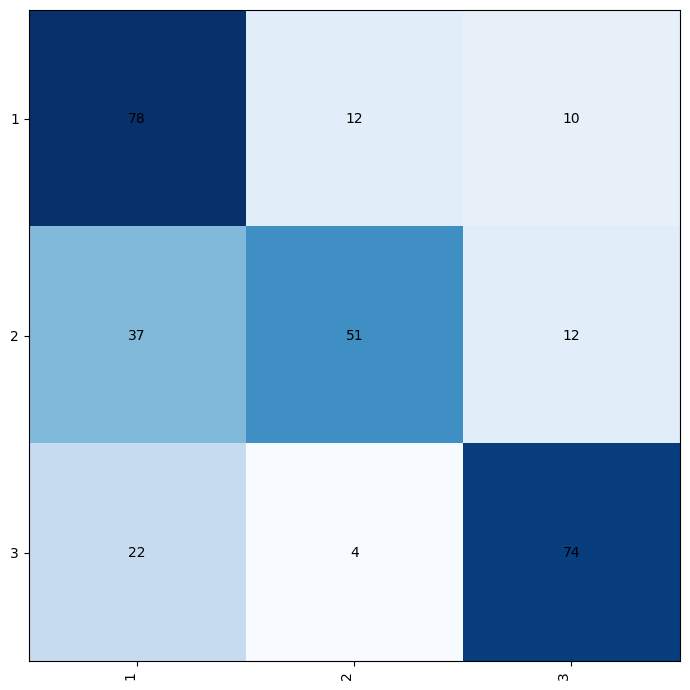

In [9]:
# get metrics and confusion matrix
test_loss, test_acc, test_precision, test_recall, test_confusion_matrix = evaluate_model(
    model, balanced_adj_test_loader, loss_fn, device, return_confusion_matrix=True
)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}, Test Precision: {test_precision}, Test Recall: {test_recall}")
draw_confusion_matrix(test_confusion_matrix, balanced_adj_val_set, balanced_adj_train_set.classes)

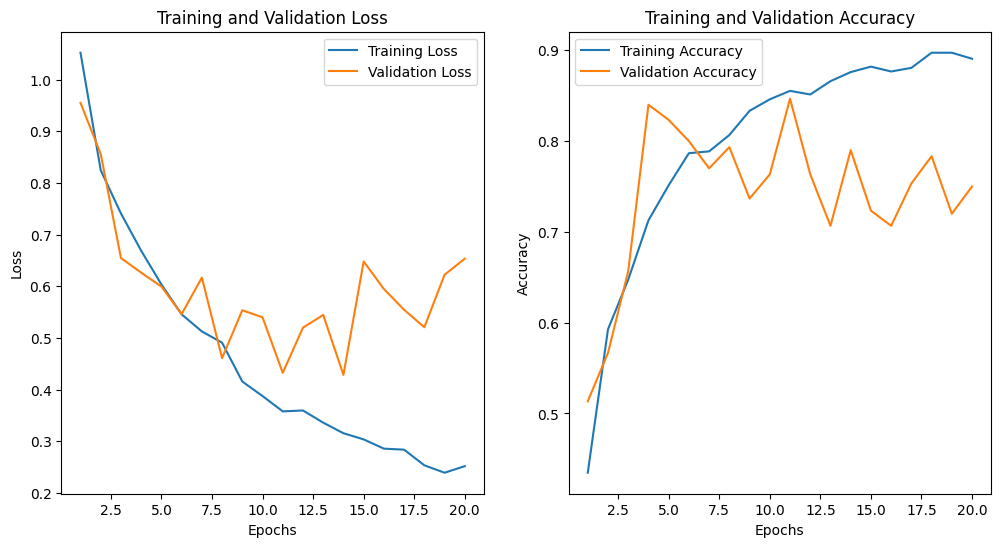

In [10]:
# plot train and val loss
plot_train_val_graphs(epochs, training_losses, training_accuracy, validation_losses, validation_accuracy)

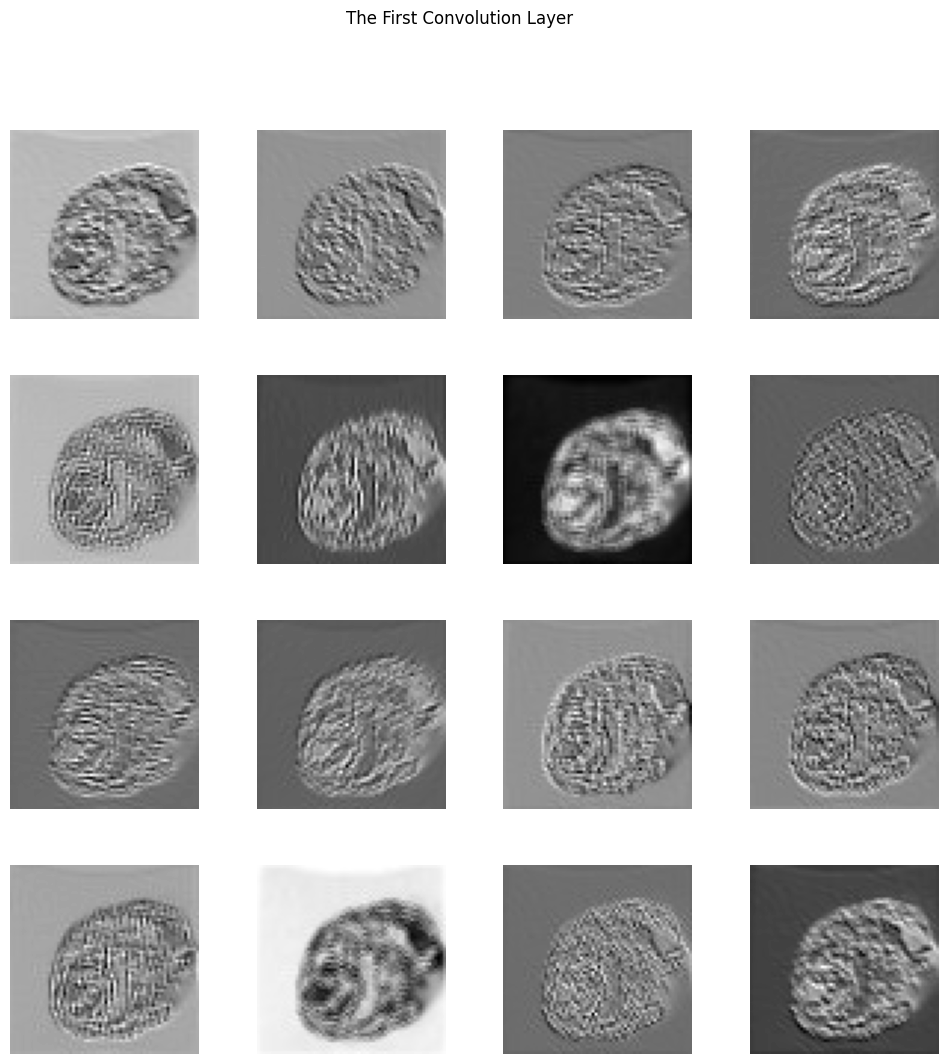

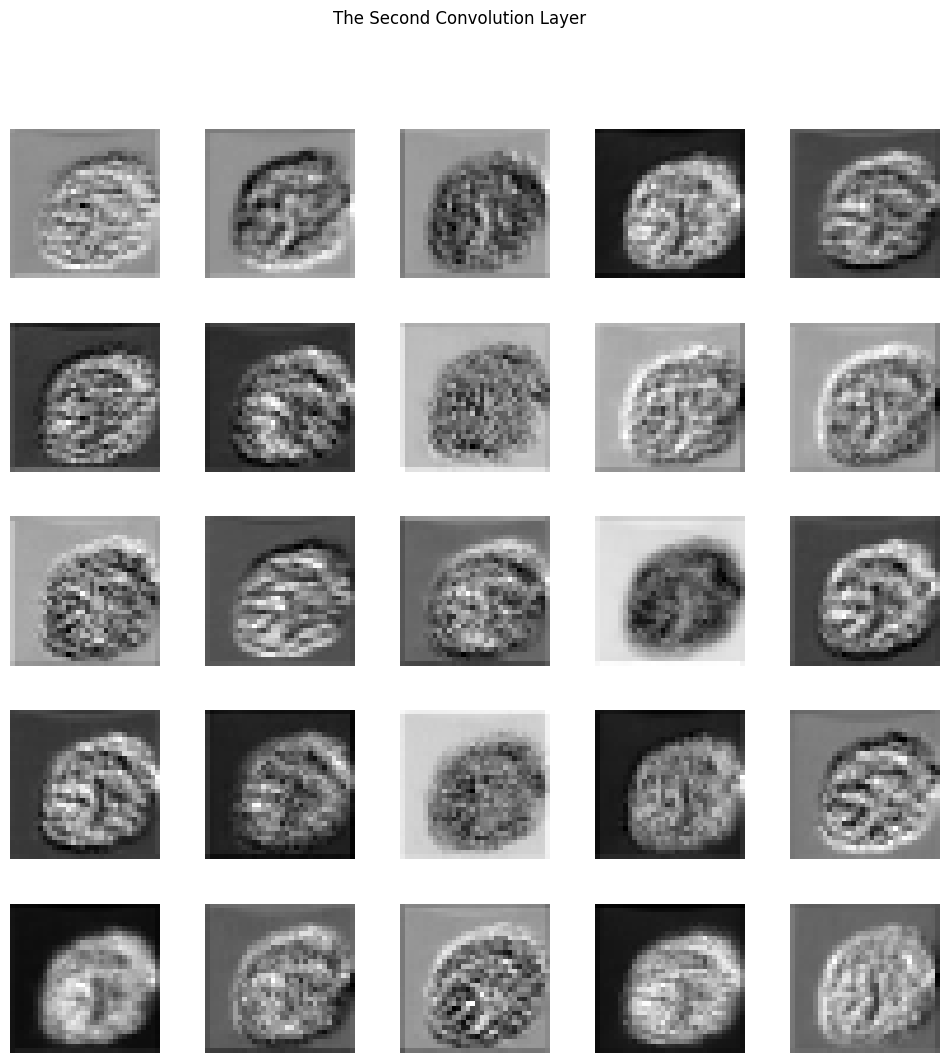

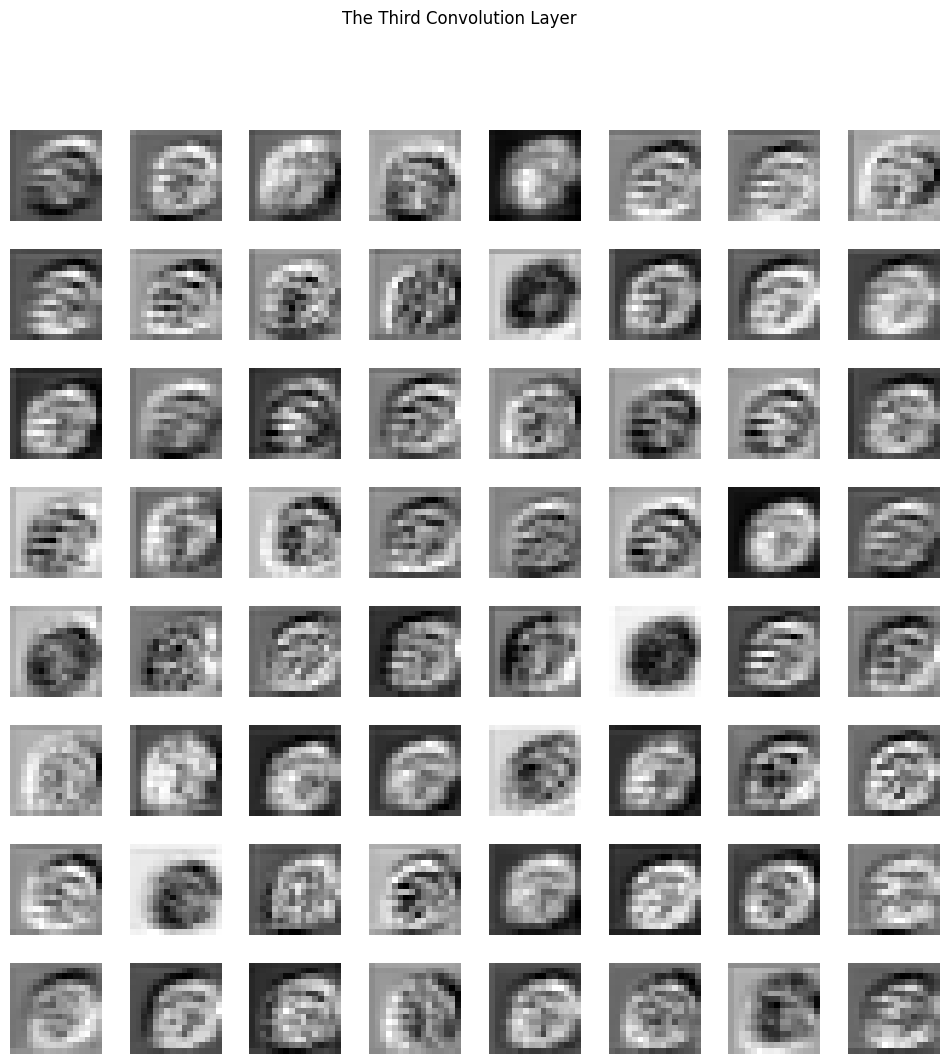

In [11]:
# observere intermediate layer outputs
visualize_con_layers(model, device, balanced_adj_test_loader)

Train and Evaluate Paper's Model

In [12]:
# create train, validition, and test sets
balanced_pap_train_set = torchvision.datasets.ImageFolder(
    'balanced_data/tumor_only/train',
    transform=paper_transform
)

balanced_pap_train_loader = torch.utils.data.DataLoader(
    balanced_pap_train_set,
    batch_size=128,
    shuffle=True,
    num_workers=0,  
    pin_memory=True,
)

balanced_pap_val_set = torchvision.datasets.ImageFolder(
    'balanced_data/tumor_only/validation',
    transform=paper_transform
)

balanced_pap_val_loader = torch.utils.data.DataLoader(
    balanced_pap_val_set,
    batch_size=128,
    shuffle=True,
    num_workers=0, 
    pin_memory=True,
)

balanced_pap_test_set = torchvision.datasets.ImageFolder(
    'balanced_data/tumor_only/test',
    transform=paper_transform
)

balanced_pap_test_loader = torch.utils.data.DataLoader(
    balanced_pap_test_set,
    batch_size=128,
    shuffle=True,
    num_workers=0,  
    pin_memory=True,
)

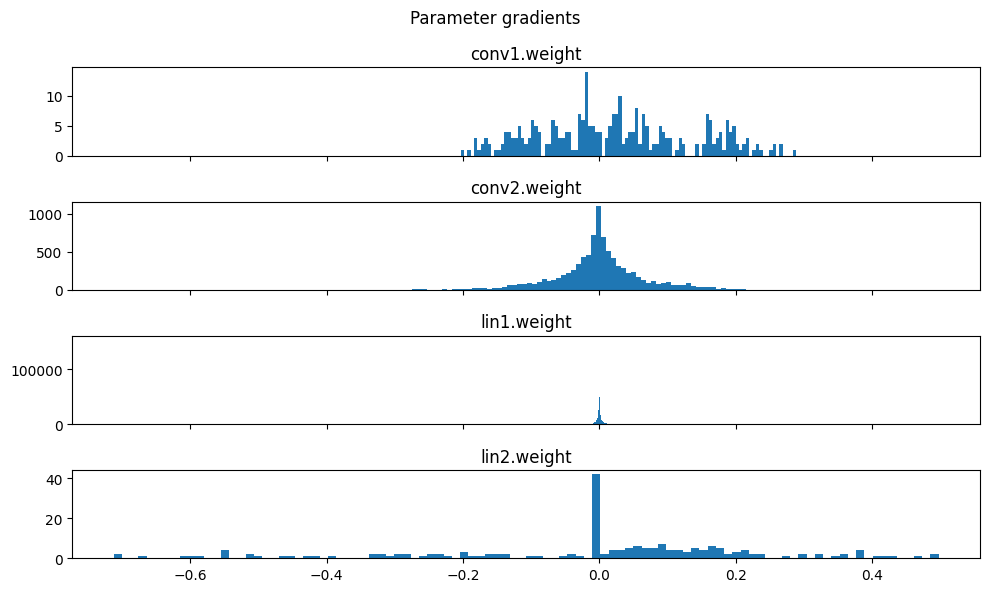

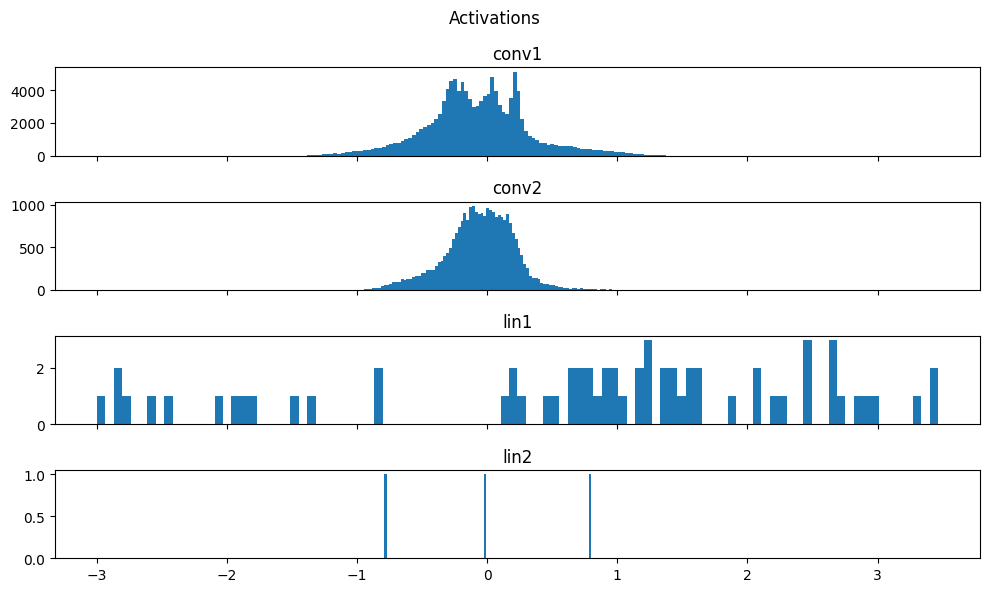

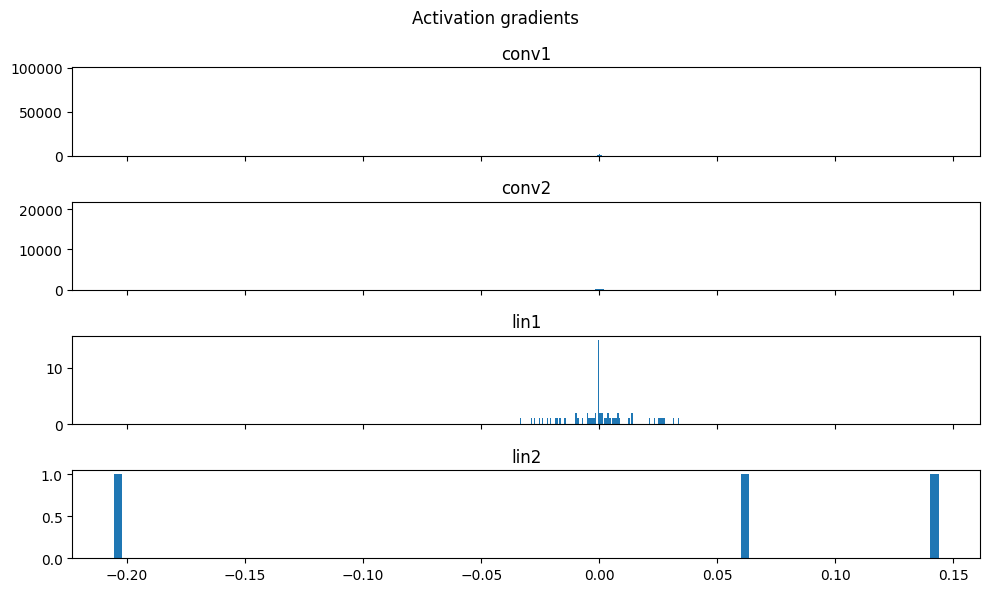

epoch: 1/10 | train loss=1.0512, train_acc=0.4460 | val loss: 0.9452, val_acc=0.6767
epoch: 2/10 | train loss=0.8863, train_acc=0.6693 | val loss: 0.7840, val_acc=0.7900


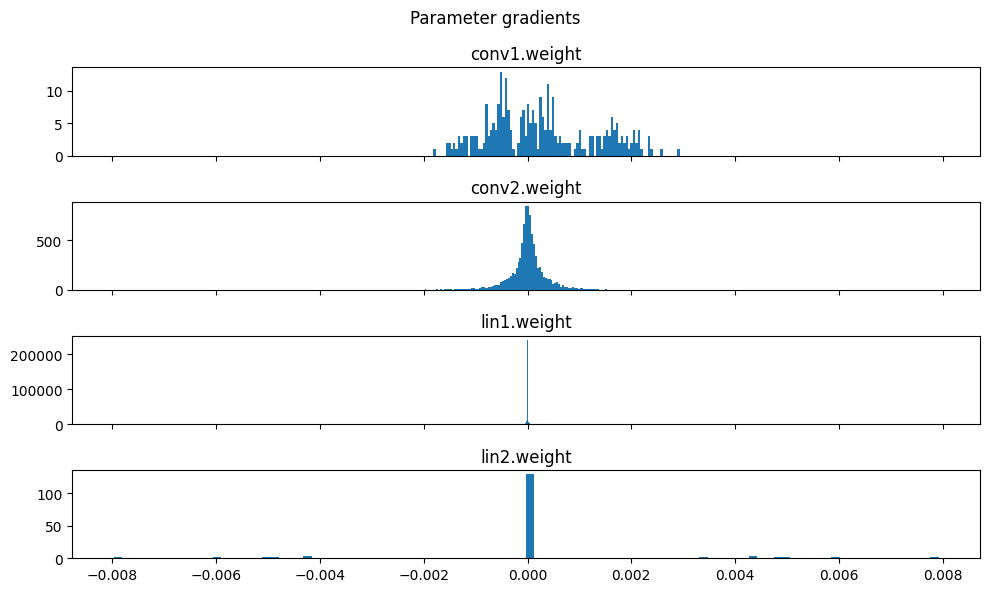

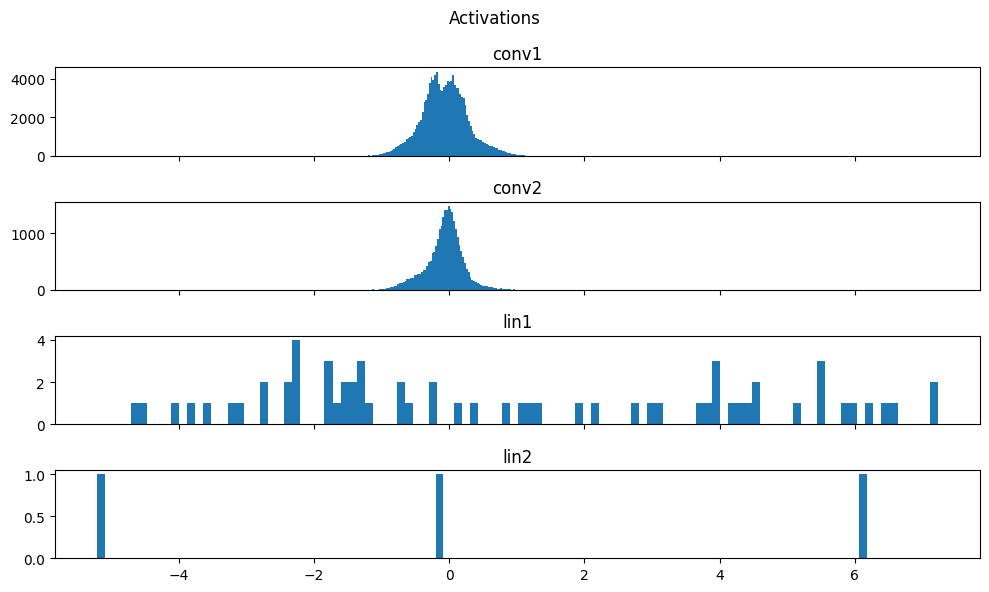

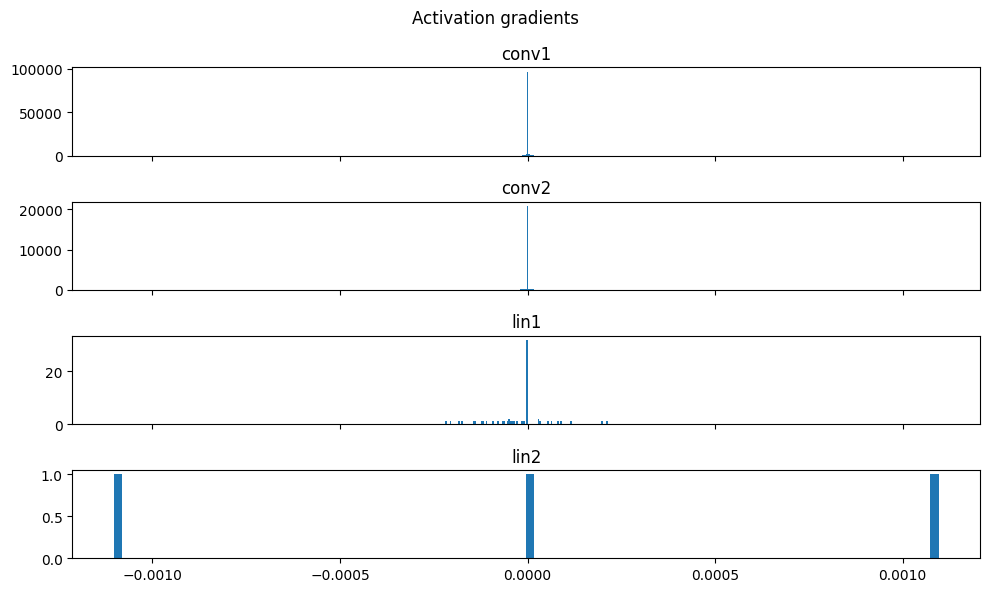

epoch: 3/10 | train loss=0.8021, train_acc=0.7573 | val loss: 0.7129, val_acc=0.8367
epoch: 4/10 | train loss=0.7657, train_acc=0.7920 | val loss: 0.6739, val_acc=0.8467


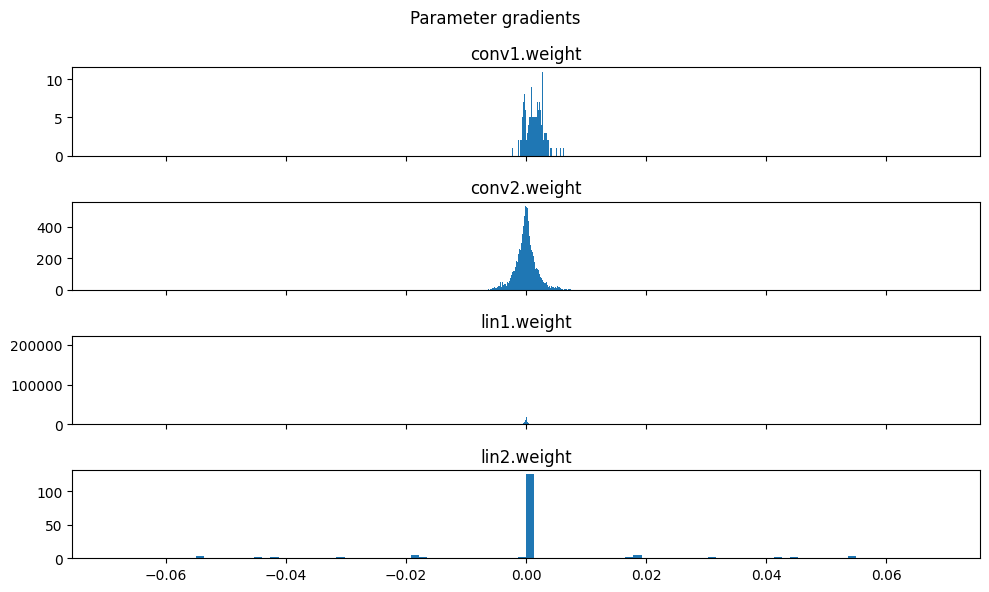

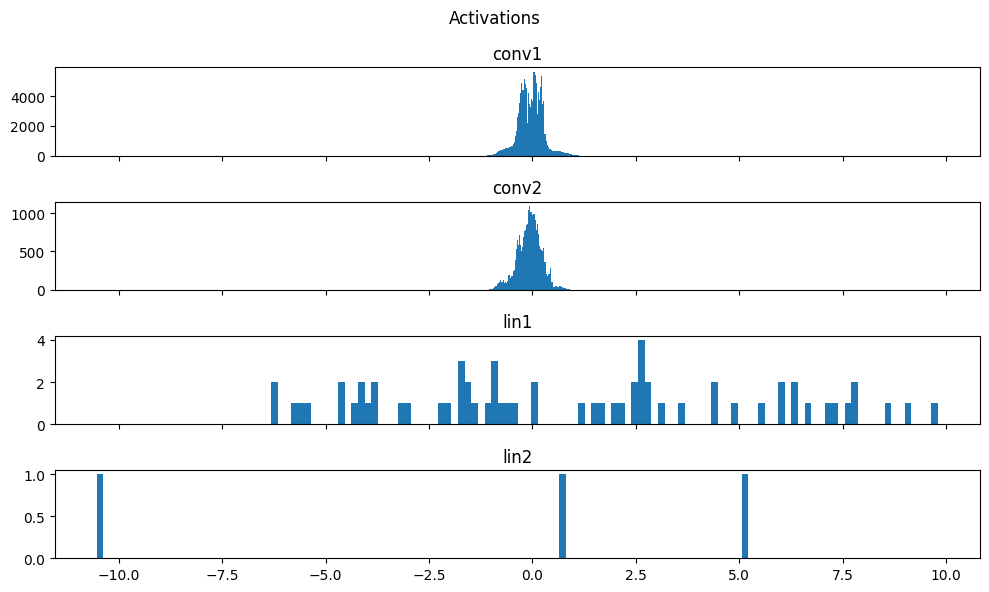

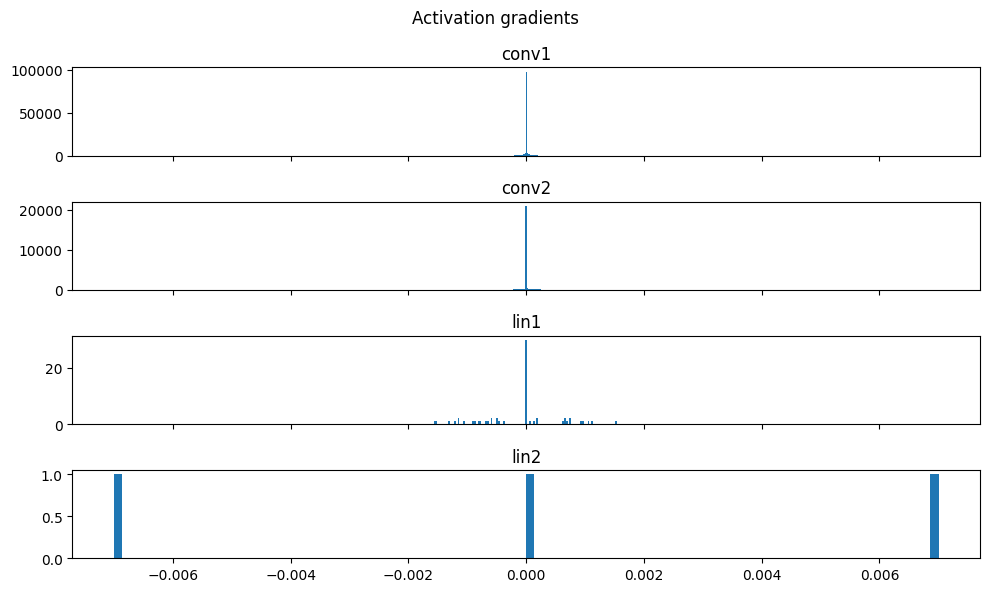

epoch: 5/10 | train loss=0.7634, train_acc=0.7933 | val loss: 0.7242, val_acc=0.8300
epoch: 6/10 | train loss=0.7489, train_acc=0.8033 | val loss: 0.7361, val_acc=0.8167


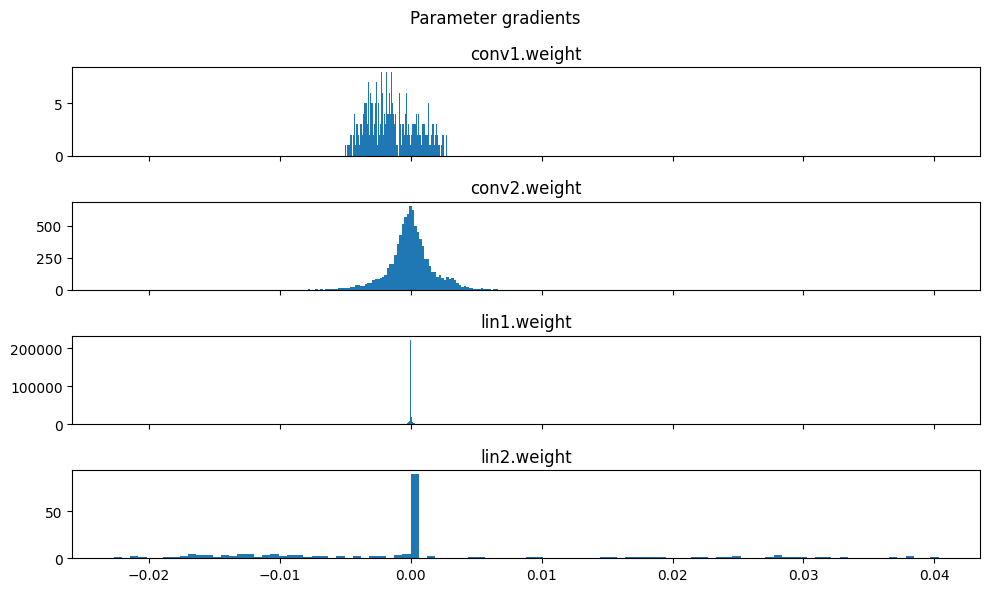

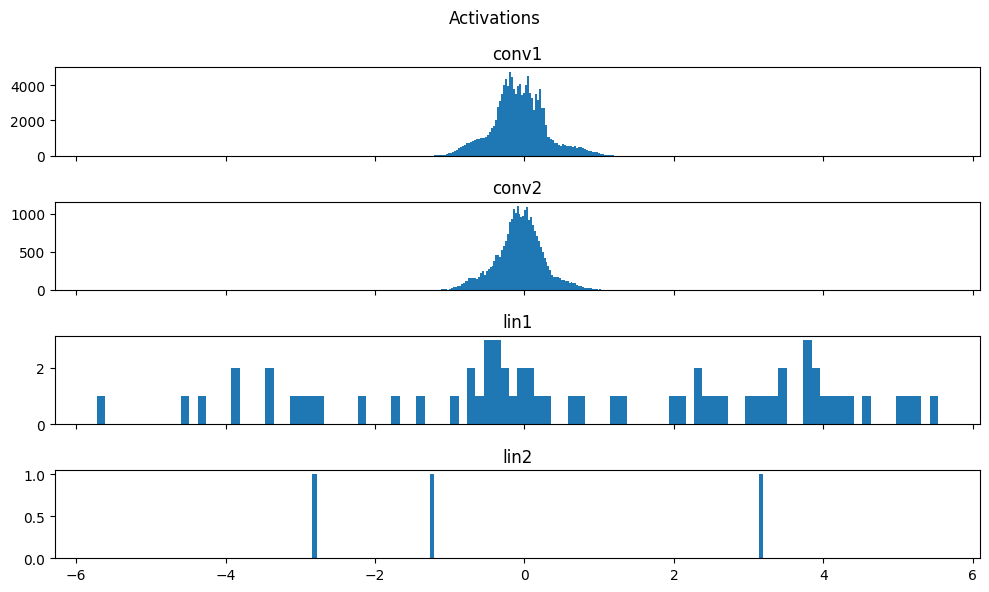

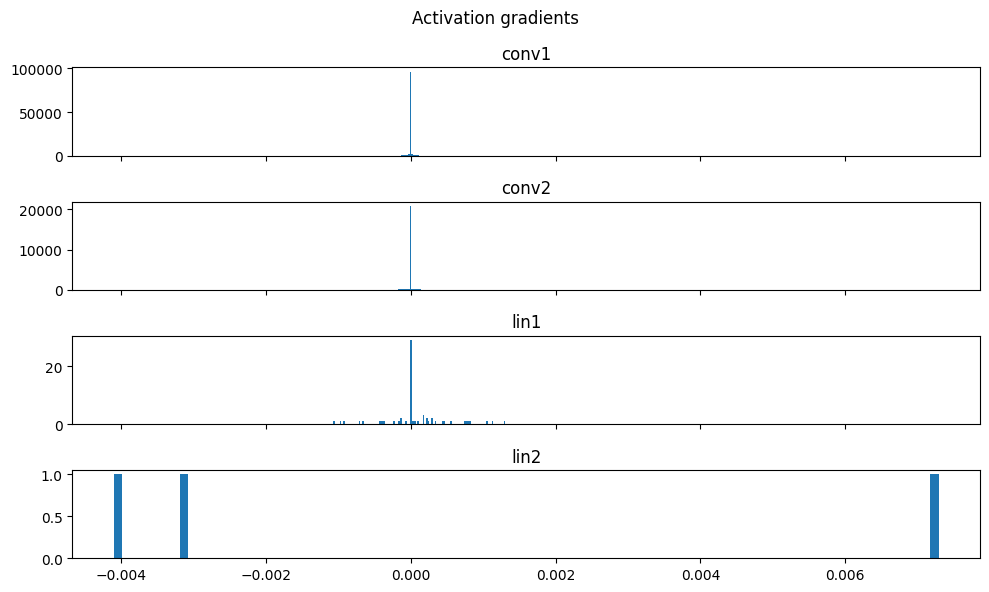

epoch: 7/10 | train loss=0.7275, train_acc=0.8193 | val loss: 0.7169, val_acc=0.8433
epoch: 8/10 | train loss=0.7206, train_acc=0.8273 | val loss: 0.7035, val_acc=0.8433


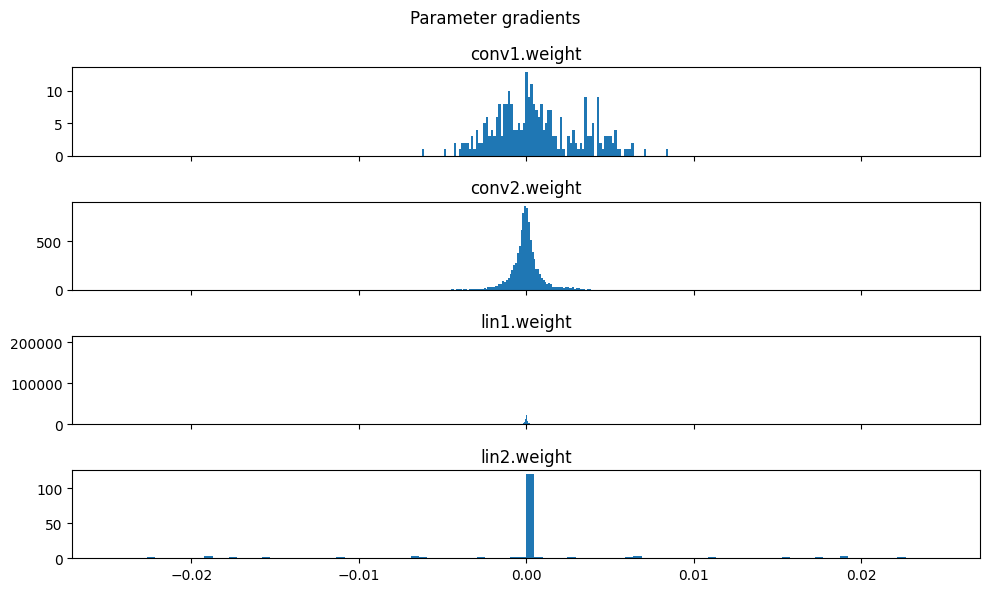

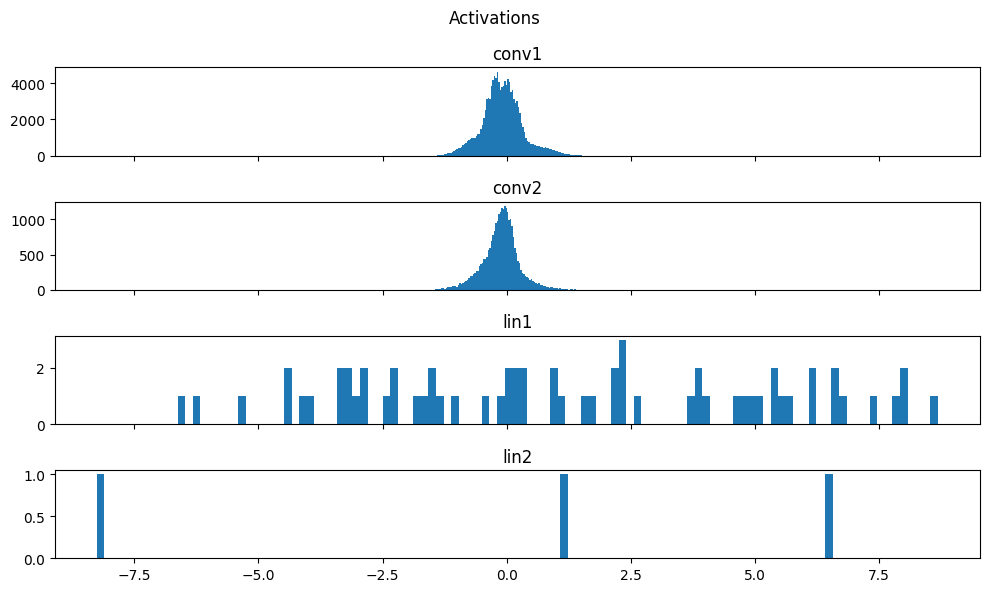

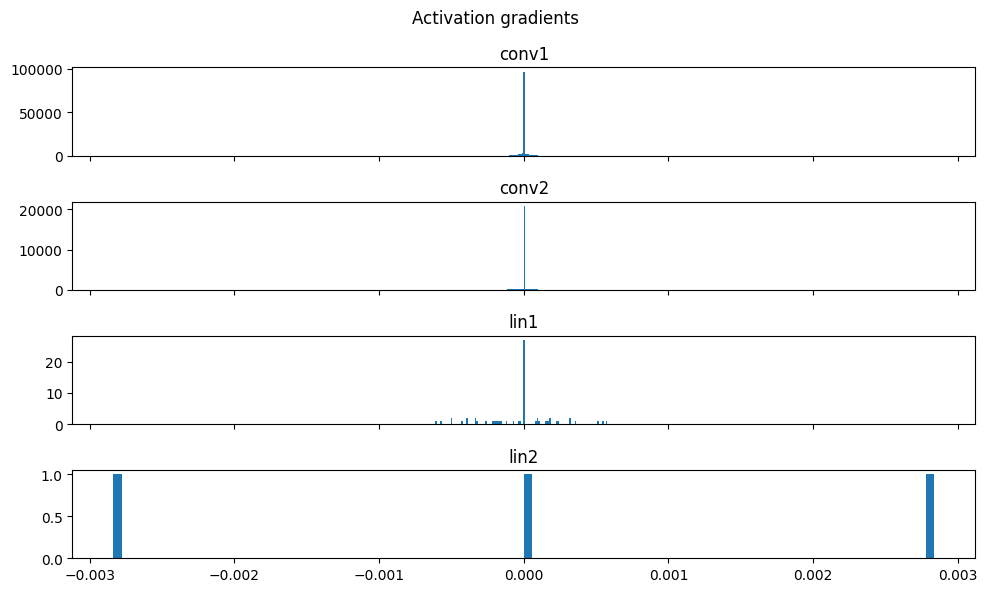

epoch: 9/10 | train loss=0.7078, train_acc=0.8447 | val loss: 0.7281, val_acc=0.8167
epoch: 10/10 | train loss=0.6907, train_acc=0.8633 | val loss: 0.7487, val_acc=0.8000


In [14]:
# paper's model
model = BrainTumorCLF(3).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 10

training_losses = []
training_accuracy = []
validation_losses = []
validation_accuracy = []

for epoch in range(epochs):
    plot_grads = True if epoch % 2 == 0 else False
    train_loss, train_acc = train_model(model, balanced_pap_train_loader, loss_fn, optimizer, plot_grads)
    training_losses.append(train_loss)
    val_loss, val_acc, val_precision, val_recall = evaluate_model(model, balanced_pap_val_loader, loss_fn, device)
    validation_losses.append(val_loss)
    print(
        f"epoch: {epoch+1}/{epochs} | train loss={np.mean(train_loss):.4f}, {train_acc=:.4f} | val loss: {np.mean(val_loss):.4f}, {val_acc=:.4f}"
    )

In [ ]:
test_loss, test_acc, test_precision, test_recall, test_confusion_matrix = evaluate_model(
    model, balanced_pap_test_loader, loss_fn, device, return_confusion_matrix=True
)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}, Test Precision: {test_precision}, Test Recall: {test_recall}")

confusion_matrix = draw_confusion_matrix(test_confusion_matrix, balanced_pap_val_set, balanced_pap_train_set.classes)